In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import pandas as pd
import seaborn as sns 
import scipy.stats as sts
from scipy.stats import linregress

In [3]:
crime_csv_path = "../Resources/Police_Department_Incidents.csv"

crime_df = pd.read_csv(crime_csv_path)
crime_df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [4]:
del crime_df["IncidntNum"]
crime_df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
crime_df.count()

Category      150500
Descript      150500
DayOfWeek     150500
Date          150500
Time          150500
PdDistrict    150499
Resolution    150500
Address       150500
X             150500
Y             150500
Location      150500
PdId          150500
dtype: int64

In [6]:
cleaned_crime_df = crime_df.dropna()

In [7]:
cleaned_crime_df.count()

Category      150499
Descript      150499
DayOfWeek     150499
Date          150499
Time          150499
PdDistrict    150499
Resolution    150499
Address       150499
X             150499
Y             150499
Location      150499
PdId          150499
dtype: int64

In [8]:
cleaned_crime_df["Resolution"].unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [9]:
cleaned_crime_df["Resolution"].value_counts()

NONE                                      107779
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [10]:
cleaned_crime_df["Category"].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [11]:
cleaned_crime_df["Category"].value_counts()

LARCENY/THEFT                  40408
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [12]:
cleaned_crime_df = cleaned_crime_df.replace({"PROSTITUTION": "PROSTITUTION", "SEX OFFENSES, NON FORCIBLE": "PROSTITUTION",
                             "DRUNKENNESS": "DISORDERLY CONDUCT"})
cleaned_crime_df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [13]:
cleaned_crime_df = cleaned_crime_df.replace({"LARCENY/THEFT": "THEFT",
                            "VEHICLE THEFT": "THEFT"})

In [14]:
cleaned_crime_df = cleaned_crime_df.replace({"FORGERY/COUNTERFEITING": "FRAUD",
                            "BAD CHECKS": "FRAUD",
                            "EMBEZZLEMENT": "FRAUD"})

In [15]:
cleaned_crime_df["Category"].value_counts()

THEFT                          46827
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
FRAUD                           3456
ROBBERY                         3299
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
DISORDERLY CONDUCT              1123
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
PROSTITUTION                     681
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
LIQUOR LAWS                      156
RUNAWAY                          140
SUICIDE                           69
BRIBERY                           66
E

In [16]:
cleaned_crime_df["PdDistrict"].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [17]:
grouped_crime_df = cleaned_crime_df.groupby(["Category"])
grouped_crime_df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...
74645,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,09/05/2016 12:00:00 AM,20:43,SOUTHERN,NONE,400 Block of MISSION ST,-122.397092,37.790066,"(37.7900661929348, -122.397091759801)",16074026327197
79666,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Tuesday,09/27/2016 12:00:00 AM,07:26,INGLESIDE,"ARREST, BOOKED",3300 Block of MISSION ST,-122.421965,37.742261,"(37.742261383285, -122.421964745809)",16078386527197
139895,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Tuesday,06/28/2016 12:00:00 AM,16:42,TENDERLOIN,"ARREST, BOOKED",0 Block of JONES ST,-122.412193,37.781605,"(37.7816045741252, -122.412192555721)",16025879914060
145619,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Wednesday,07/13/2016 12:00:00 AM,15:07,TARAVAL,"ARREST, BOOKED",48TH AV / KIRKHAM ST,-122.507934,37.758465,"(37.7584647037552, -122.507934292563)",16056610014060


In [18]:
cleaned_crime_df = cleaned_crime_df.replace({"ARREST, BOOKED": "ARREST",
                            "ARREST, CITED": "ARREST"})

In [19]:
cleaned_crime_df = cleaned_crime_df.replace({"NOT PROSECUTED": "NOT PROSECUTED",
                            "COMPLAINANT REFUSES TO PROSECUTE": "NOT PROSECUTED"})

In [20]:
cleaned_crime_df = cleaned_crime_df.replace({"ARREST, BOOKED": "ARREST",
                            "ARREST, CITED": "ARREST"})

In [21]:
cleaned_crime_df = cleaned_crime_df.replace({"ARREST, BOOKED": "ARREST",
                            "ARREST, CITED": "ARREST"})

In [22]:
cleaned_crime_df["Resolution"].value_counts()

NONE                                      107779
ARREST                                     39560
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                24
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [23]:
cleaned_crime_df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,ARREST,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,ARREST,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,ARREST,KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [24]:
%matplotlib notebook

In [25]:
cleaned_crime_df = cleaned_crime_df[cleaned_crime_df.Resolution != "NONE"]

<IPython.core.display.Javascript object>


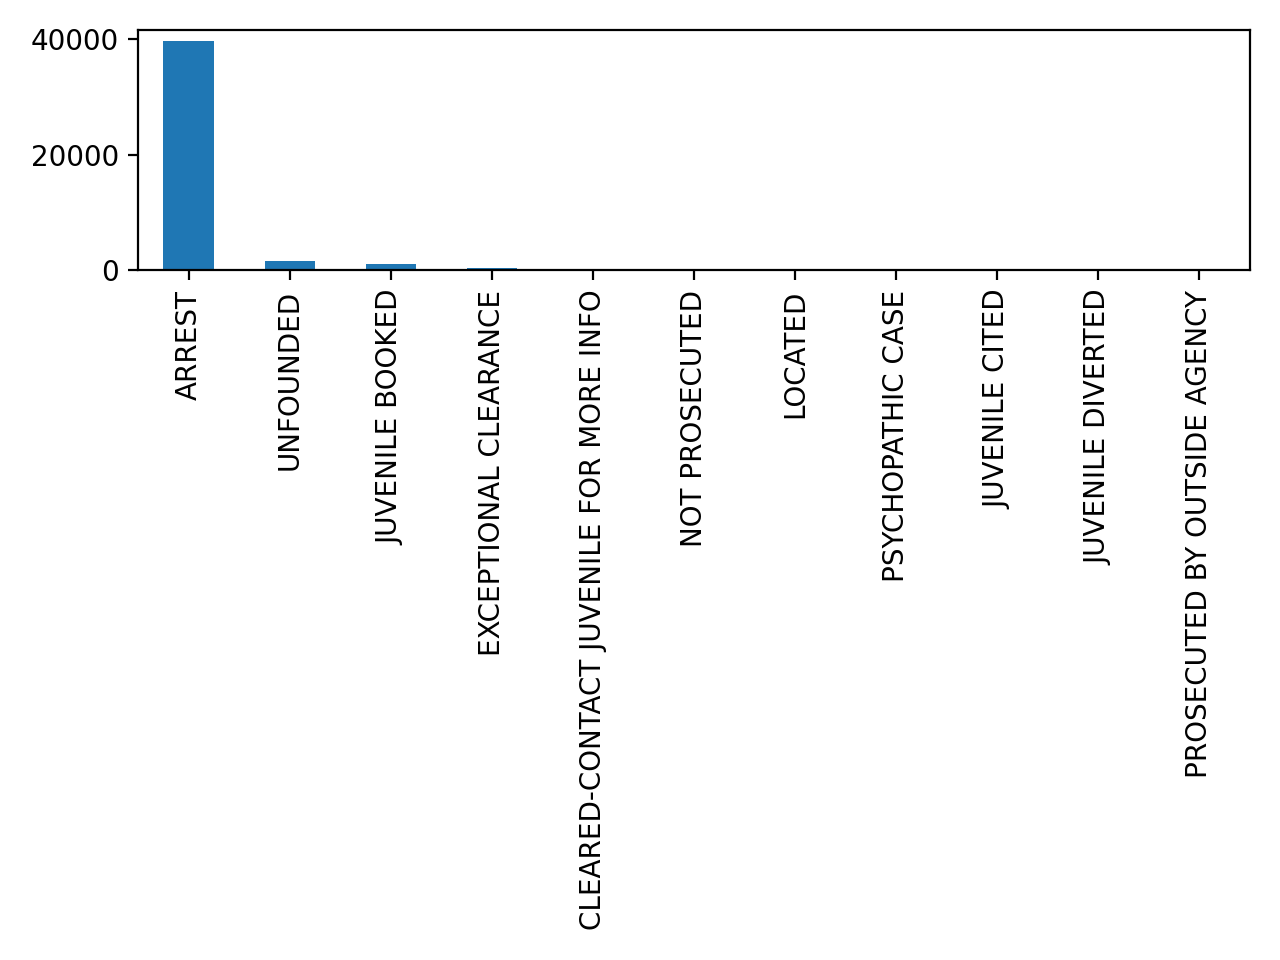

In [26]:
resolution_grp = cleaned_crime_df["Resolution"].value_counts()
resolution_grp
resolution_chart = resolution_grp.plot(kind = "bar")
plt.show()
plt.tight_layout()

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


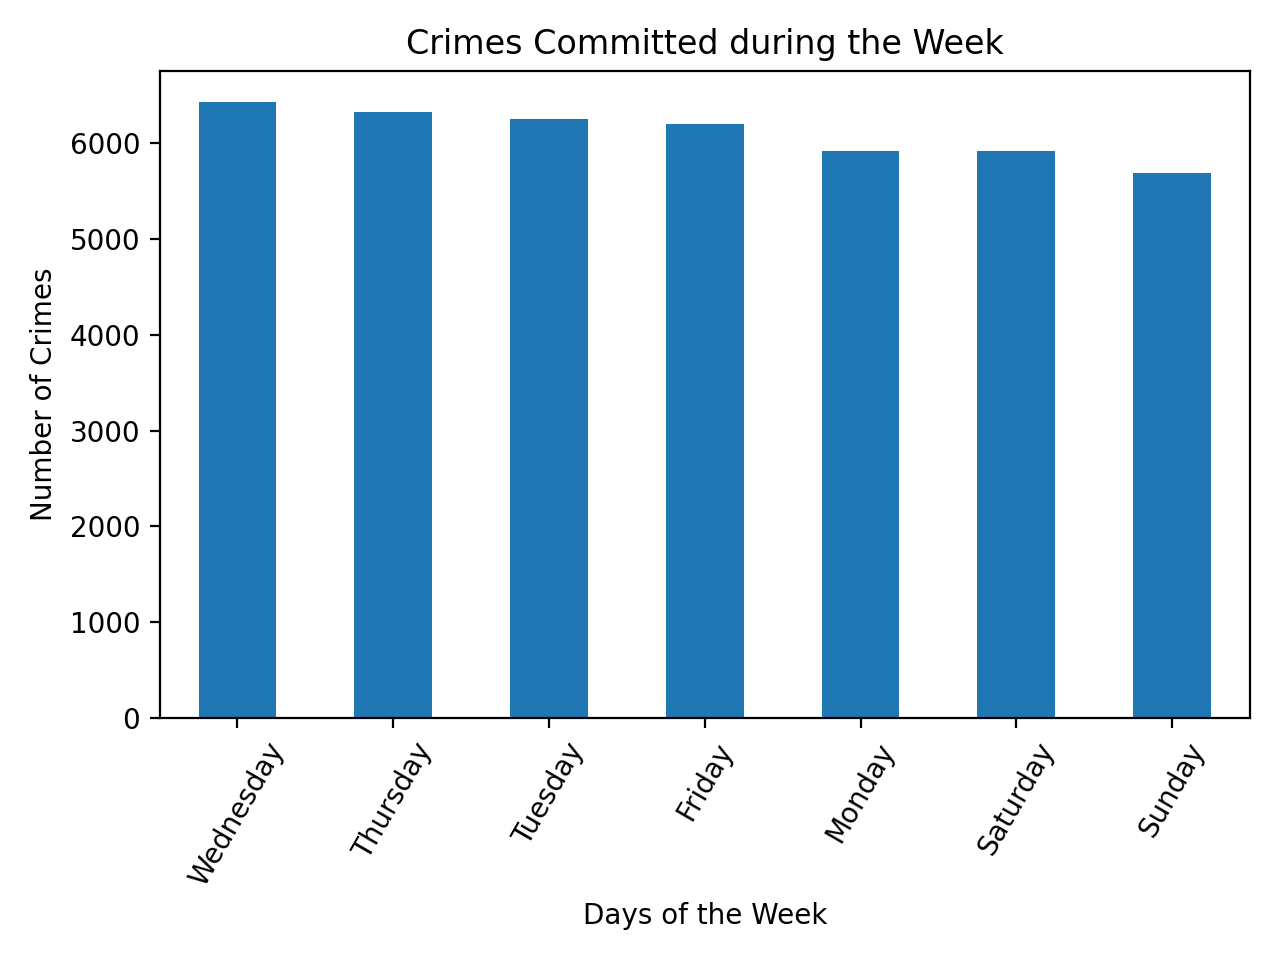

In [28]:
dow_grp = cleaned_crime_df["DayOfWeek"].value_counts()
dow_grp
dow_chart = dow_grp.plot(kind = "bar")
plt.title("Crimes Committed during the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation = 60)
plt.show()
plt.tight_layout()

In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


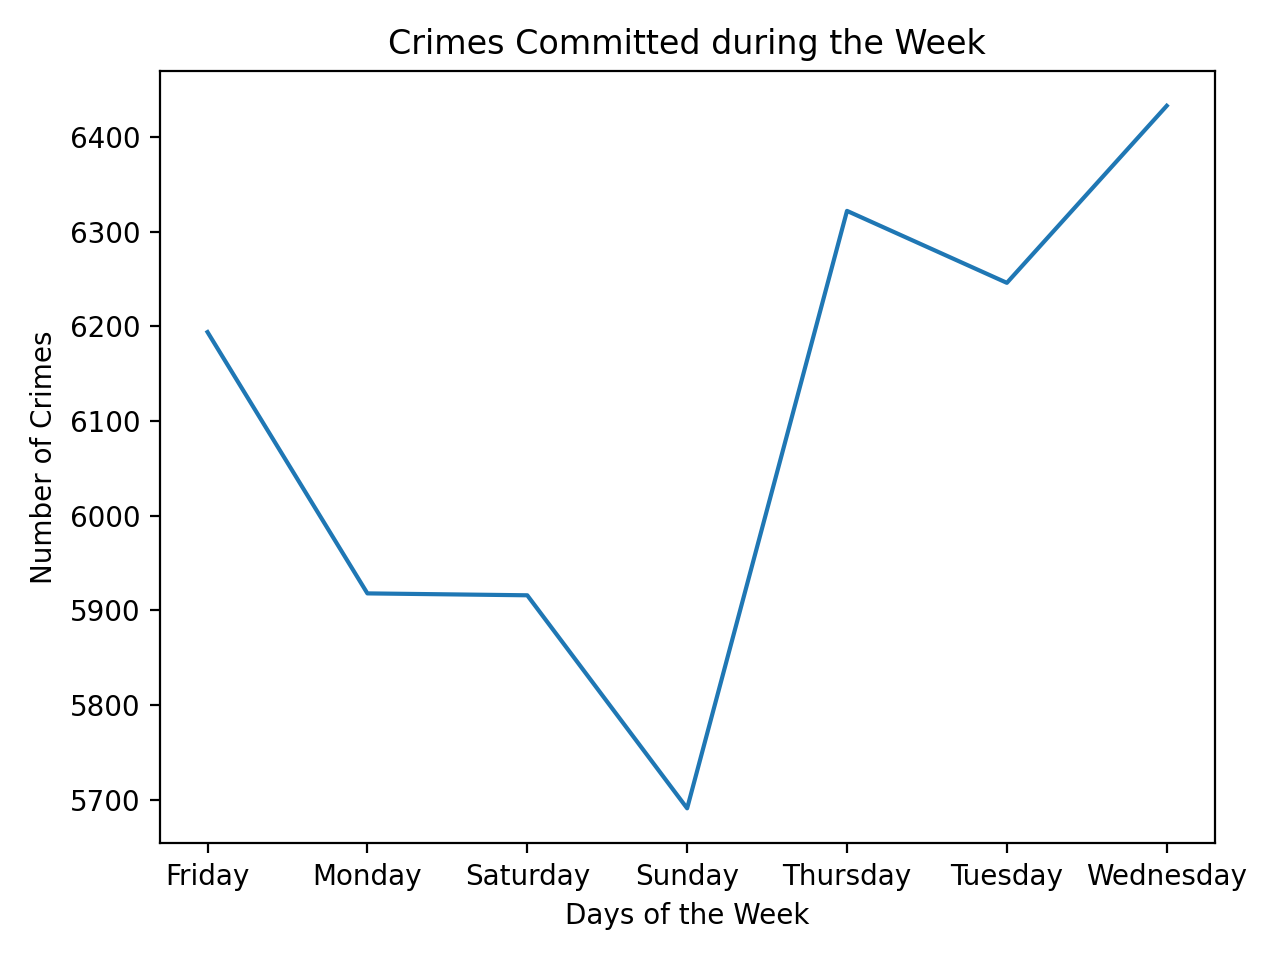

In [30]:
dow_grp = cleaned_crime_df["DayOfWeek"].value_counts()
sns.lineplot(dow_grp.index, dow_grp.values)
plt.title("Crimes Committed during the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Crimes")
plt.show()
plt.tight_layout()

In [31]:
cleaned_crime_df["PdDistrict"].value_counts()

SOUTHERN      8783
MISSION       6949
NORTHERN      4611
TENDERLOIN    4449
BAYVIEW       4225
CENTRAL       3907
INGLESIDE     3091
TARAVAL       2896
PARK          2121
RICHMOND      1688
Name: PdDistrict, dtype: int64

In [32]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


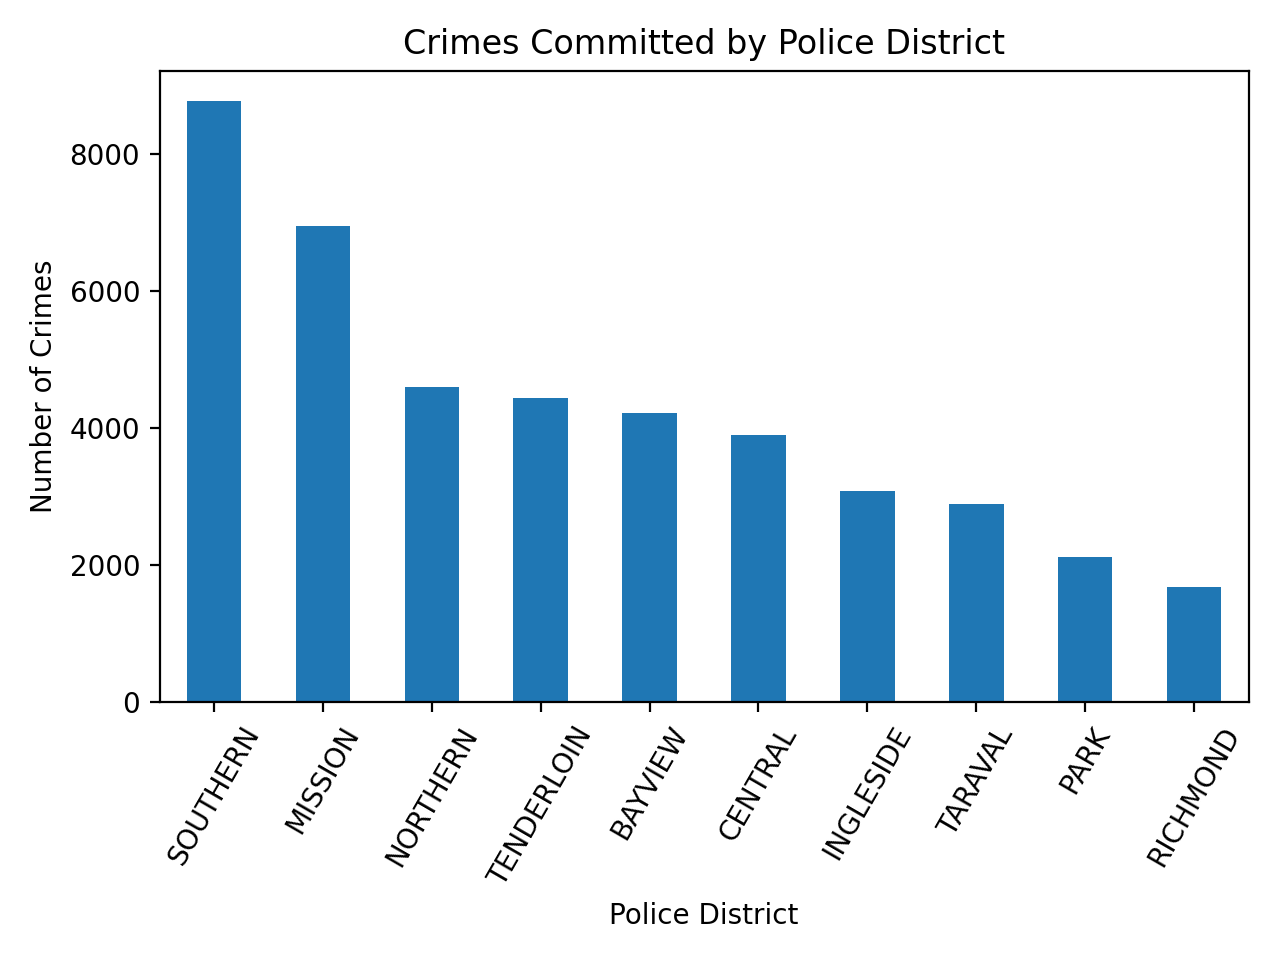

In [33]:
district_grp = cleaned_crime_df["PdDistrict"].value_counts()
district_grp
district_chart = district_grp.plot(kind = "bar")
plt.title("Crimes Committed by Police District")
plt.xlabel("Police District")
plt.ylabel("Number of Crimes")
plt.xticks(rotation = 60)
plt.show()
plt.tight_layout()

In [34]:
cleaned_crime_df = crime_df[crime_df.Category != "OTHER OFFENSES"]

In [35]:
cleaned_crime_df["Category"].value_counts()

LARCENY/THEFT                  40409
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
LIQUOR LAWS                      156
R

In [36]:
%matplotlib notebook

<IPython.core.display.Javascript object>


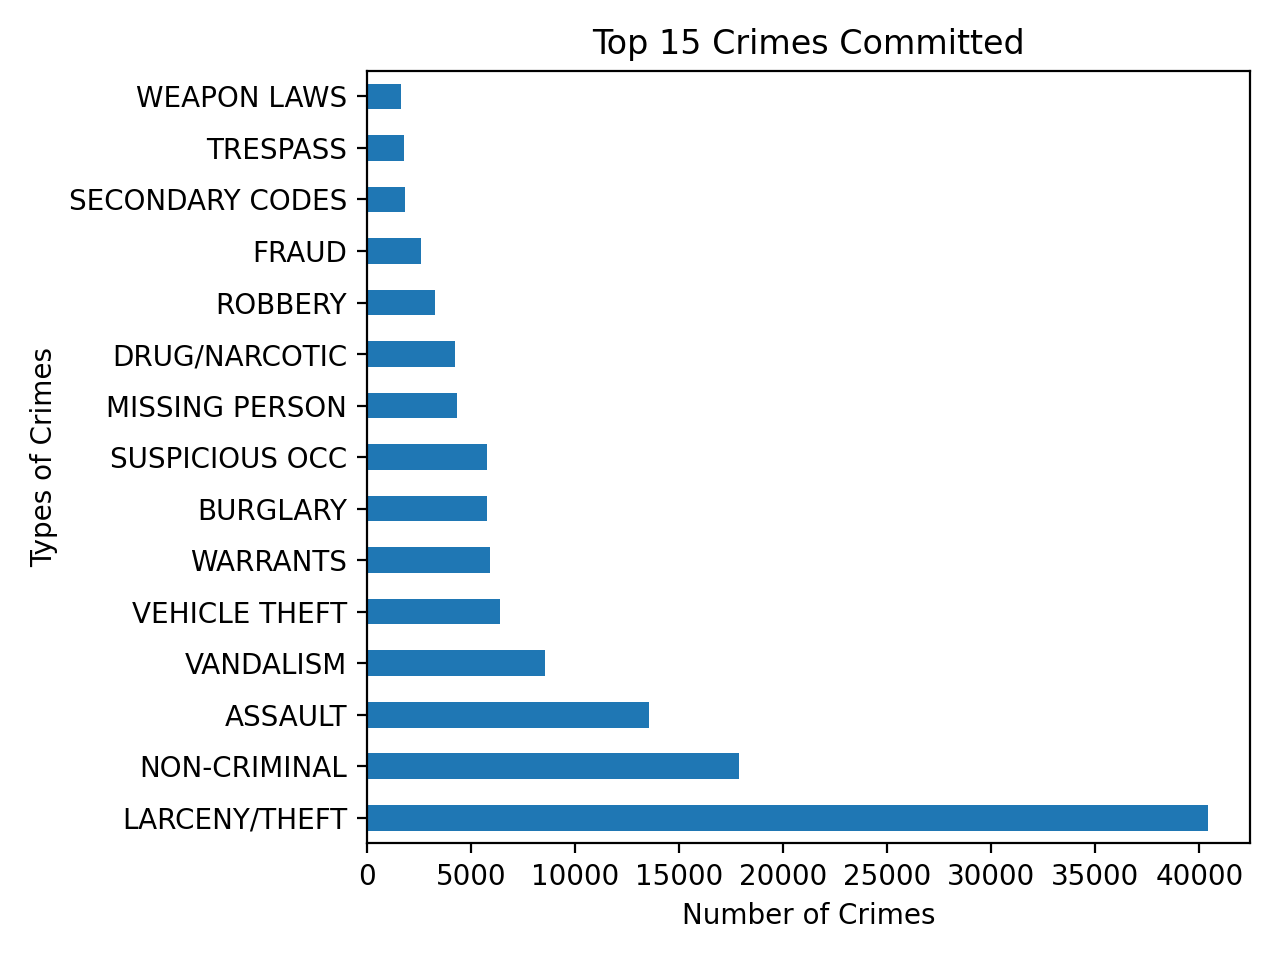

In [37]:
top_category = cleaned_crime_df["Category"].value_counts()
top_category = top_category.sort_values(ascending = False).head(15)
top_category_chart = top_category.plot(kind = "barh")
plt.title("Top 15 Crimes Committed")
plt.xlabel("Number of Crimes")
plt.ylabel("Types of Crimes")
plt.show()
plt.tight_layout()

In [58]:
len(cleaned_crime_df["Category"].value_counts())

38

In [127]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


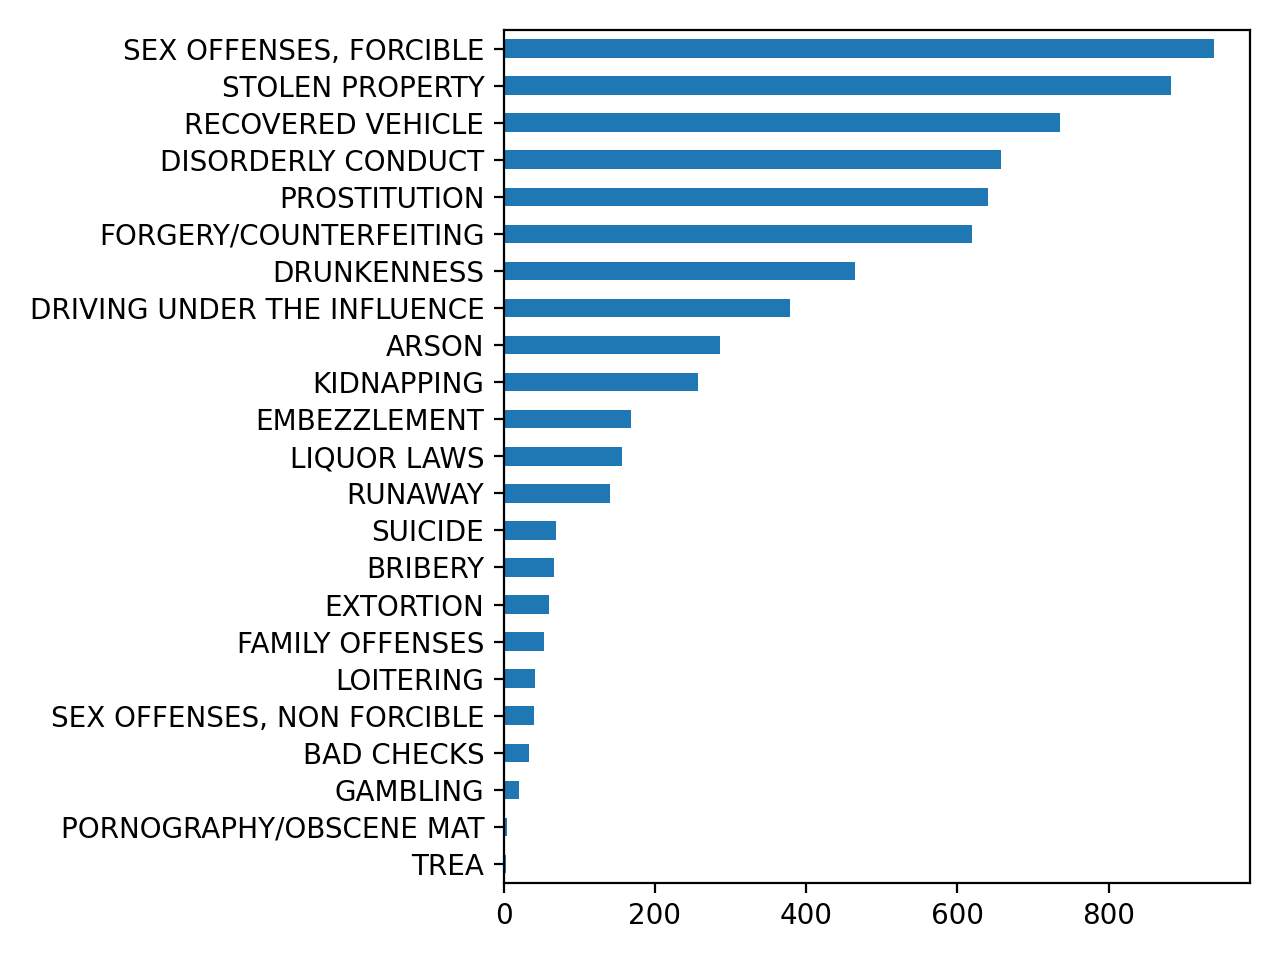

In [128]:
bottom_category = cleaned_crime_df["Category"].value_counts()
bottom_category = bottom_category.sort_values(ascending = True).head(23)
bottom_category_chart = bottom_category.plot(kind = "barh")
plt.show()
plt.tight_layout()

In [69]:
cleaned_crime_df["Hour"] = pd.to_datetime(cleaned_crime_df['Time'], format='%H:%M').dt.hour

<ipython-input-69-db8217c4f608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime_df["Hour"] = pd.to_datetime(cleaned_crime_df['Time'], format='%H:%M').dt.hour


In [135]:
%matplotlib notebook

<IPython.core.display.Javascript object>


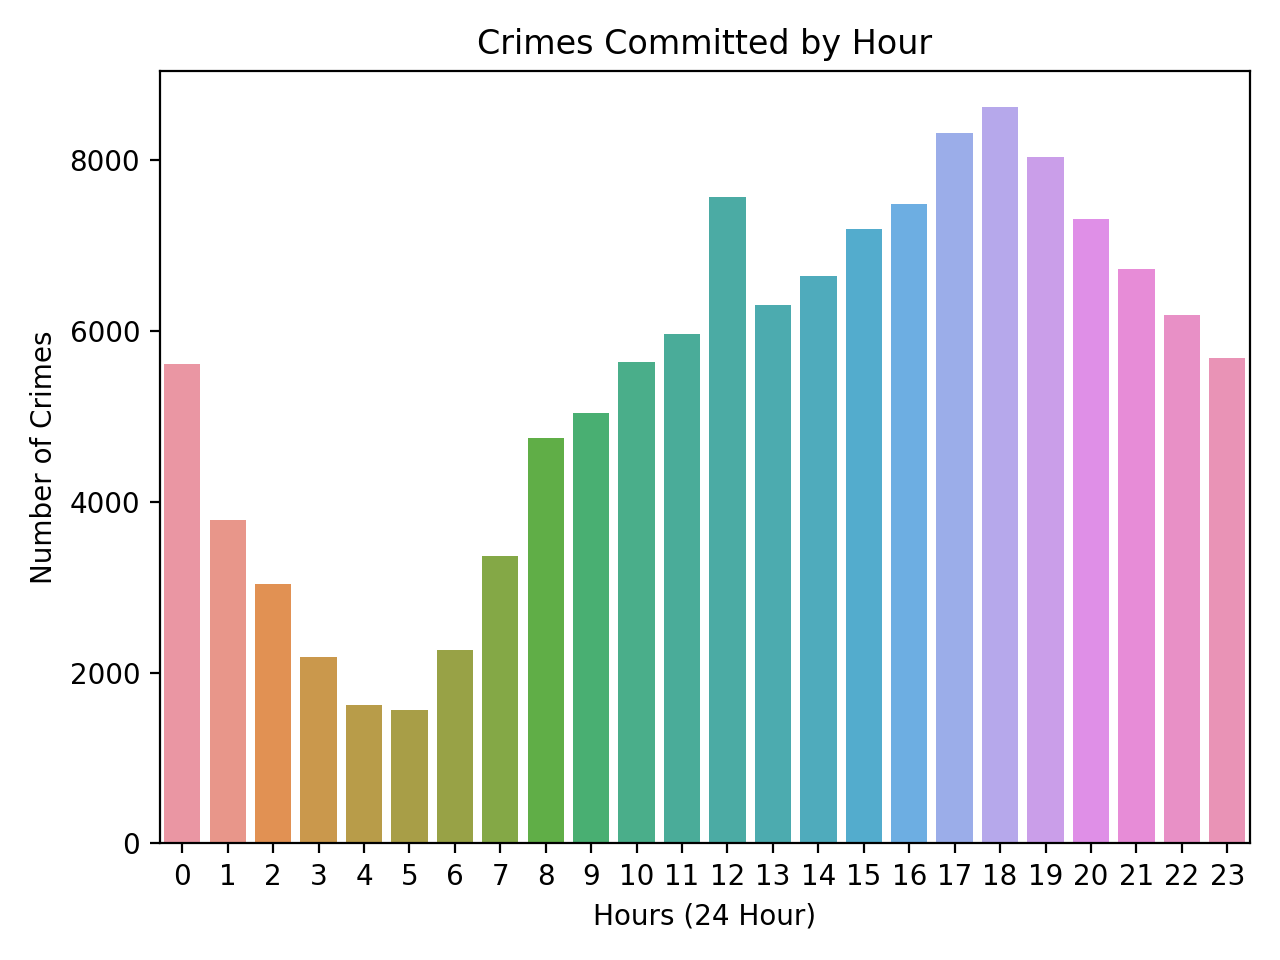

In [136]:
hour_grp = cleaned_crime_df["Hour"].value_counts()
sns.barplot(hour_grp.index, hour_grp.values)
plt.title("Crimes Committed by Hour")
plt.xlabel("Hours (24 Hour)")
plt.ylabel("Number of Crimes")
plt.show()
plt.tight_layout()

In [137]:
%matplotlib notebook

<IPython.core.display.Javascript object>


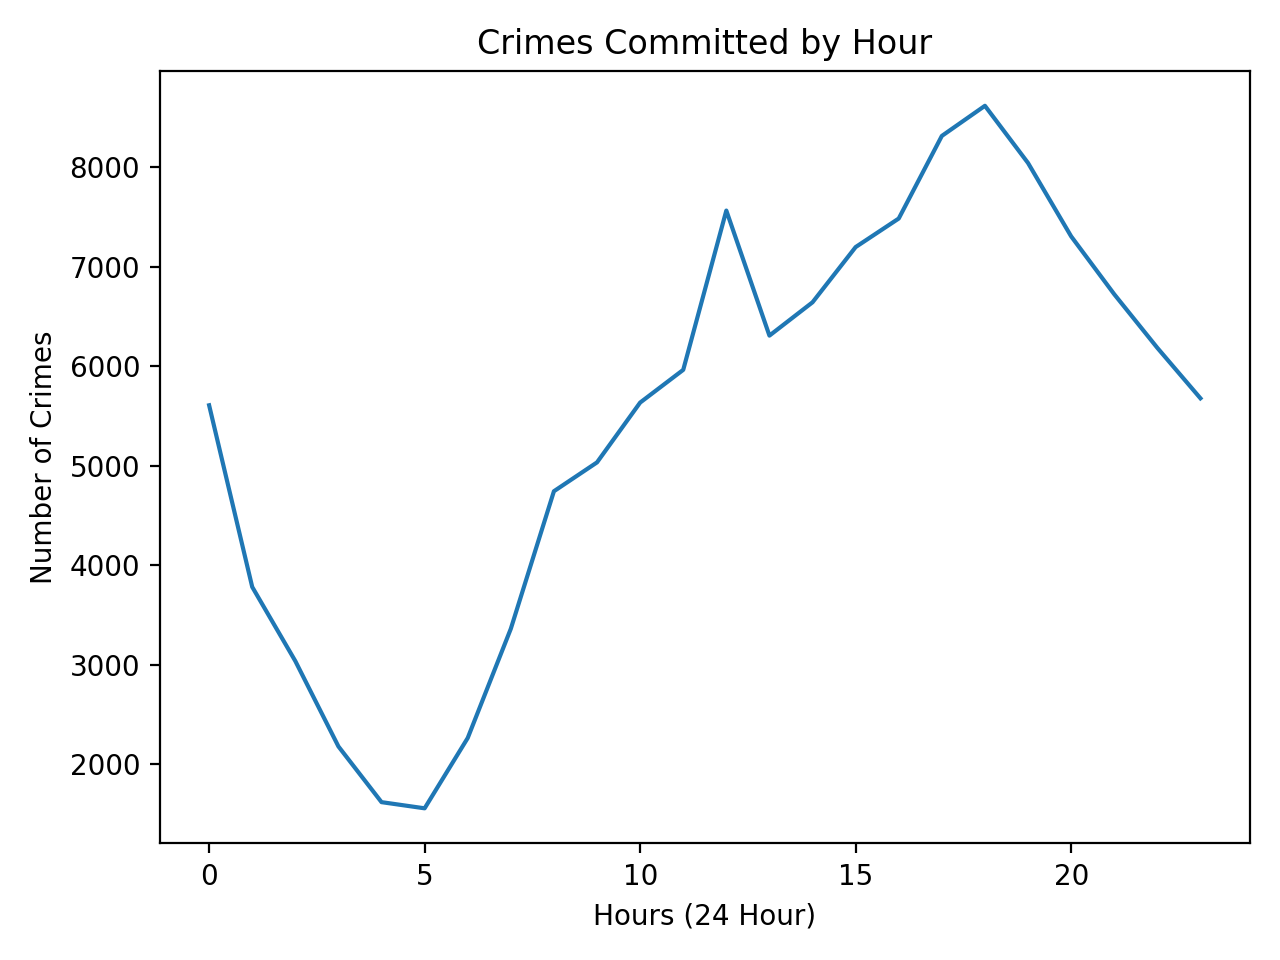

In [138]:
hour_grp = cleaned_crime_df["Hour"].value_counts()
sns.lineplot(hour_grp.index, hour_grp.values)
plt.title("Crimes Committed by Hour")
plt.xlabel("Hours (24 Hour)")
plt.ylabel("Number of Crimes")
plt.show()
plt.tight_layout()

In [139]:
cleaned_crime_df["Month"] = pd.DatetimeIndex(cleaned_crime_df['Date']).month

In [149]:
%matplotlib notebook

<IPython.core.display.Javascript object>


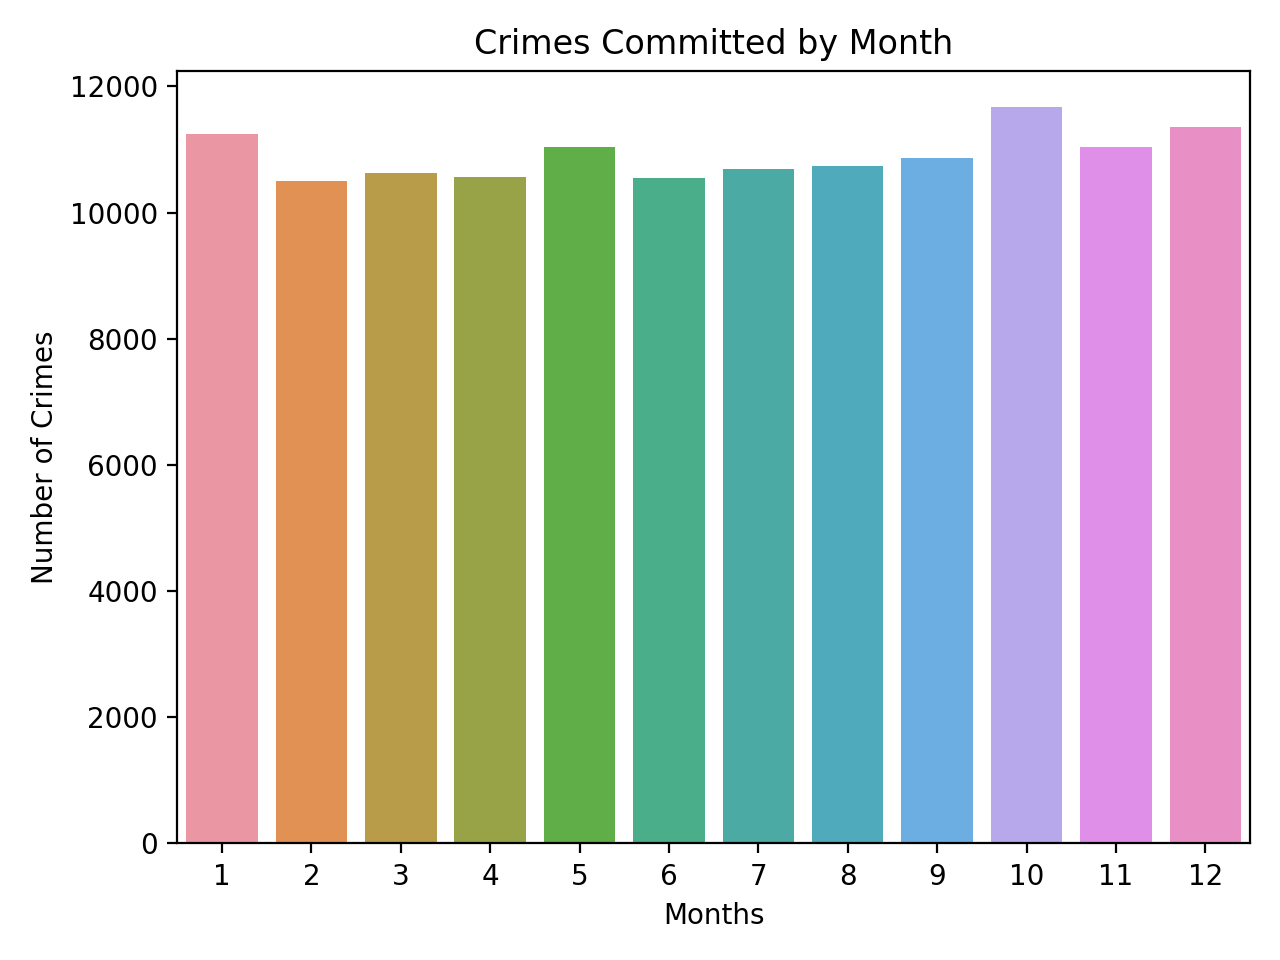

In [150]:
month_grp = cleaned_crime_df["Month"].value_counts()
sns.barplot(month_grp.index, month_grp.values)
plt.title("Crimes Committed by Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()
plt.tight_layout()

In [147]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


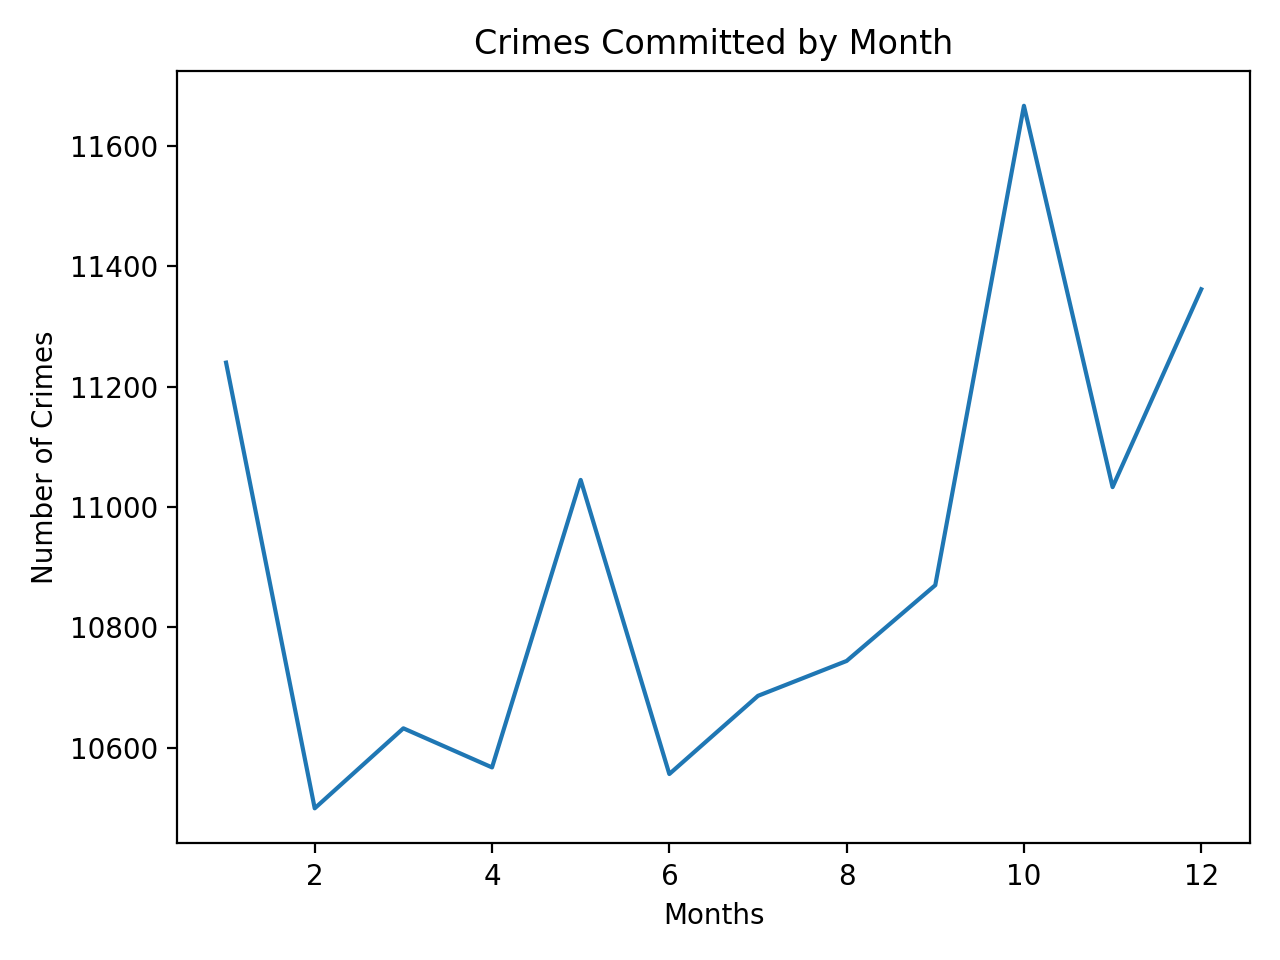

In [148]:
month_grp = cleaned_crime_df["Month"].value_counts()
sns.lineplot(month_grp.index, month_grp.values)
plt.title("Crimes Committed by Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()
plt.tight_layout()

In [152]:
month_grp = cleaned_crime_df["Month"].value_counts()
month_grp

10    11667
12    11362
1     11240
5     11045
11    11033
9     10870
8     10744
7     10686
3     10632
4     10567
6     10556
2     10499
Name: Month, dtype: int64